**Imports the All required libraries**

In [1]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
import skimage.io as io
from skimage.morphology import disk
from skimage.segmentation import watershed
from skimage.filters import rank
from skimage.util import img_as_ubyte

C:\ProgramData\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


**Load the Image**

In [2]:
image = img_as_ubyte(io.imread('images/footballer.jpg', as_gray=True))

**Denoise image**

In [3]:
denoised = rank.median(image, disk(2))

**Find continuous region (low gradient - where less than 10 for this image) --> markers disk(5) is used here to get a more smooth image**

In [4]:
markers = rank.gradient(denoised, disk(5)) < 10
markers = ndi.label(markers)[0]

**Local gradient (disk(2) is used to keep edges thin)**

In [5]:
gradient = rank.gradient(denoised, disk(2))

**Process the watershed**

In [6]:
labels = watershed(gradient, markers)

**Display results in GrayScale Image**

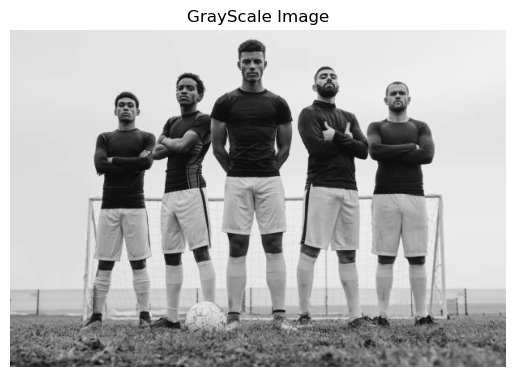

In [7]:
plt.title("GrayScale Image")
plt.axis("off")
plt.imshow(image, cmap=plt.cm.gray)

**Display results in Local Gradient Image**

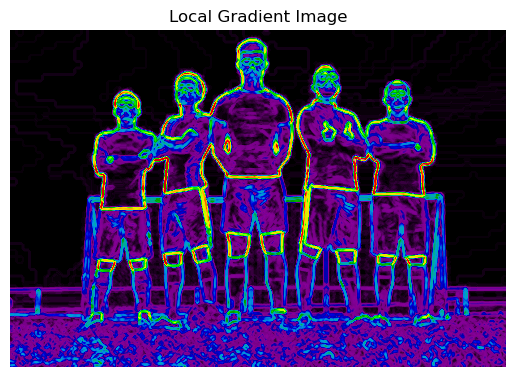

In [8]:
plt.title("Local Gradient Image")
plt.axis("off")
plt.imshow(gradient, cmap=plt.cm.nipy_spectral)

**Display results in Marker Image**

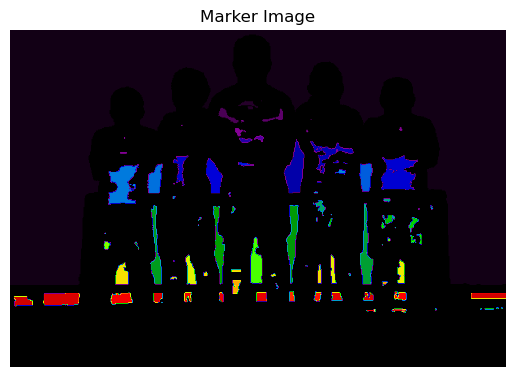

In [9]:
plt.title("Marker Image")
plt.axis("off")
plt.imshow(markers, cmap=plt.cm.nipy_spectral)

**Display results in Segmented Image**

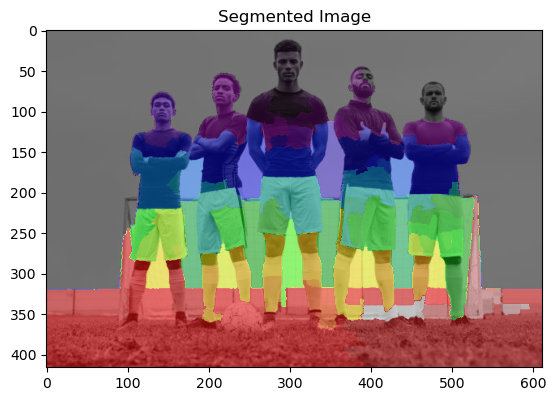

In [10]:
plt.title("Segmented Image")
plt.imshow(image, cmap=plt.cm.gray)
plt.imshow(labels, cmap=plt.cm.nipy_spectral, alpha=.5)